In [6]:
import pandas as pd
import numpy as np
import gseapy as gp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

os.chdir("/data/wuqinhua/scPhase/Age")

In [7]:
import pandas as pd
def _df_append(self, other, ignore_index=False, verify_integrity=False, sort=False):
    return pd.concat([self, other], ignore_index=ignore_index, sort=sort, axis=0)
pd.DataFrame.append = _df_append

In [8]:
gene_df_H = pd.read_csv("./ensemble_gene_attributions_regression.csv")
top_genes_H = gene_df_H.sort_values('mean_attribution', ascending=False)['gene'].head(100).tolist()
enr_H=gp.enrichr(gene_list=top_genes_H,gene_sets=['GO_Biological_Process_2025'],organism='Human',outdir='./Analysis/Figure/GSEA_plot',cutoff=1)

In [9]:
enr_H_results = enr_H.results.copy()
significant_results = enr_H_results[enr_H_results['Adjusted P-value'] < 0.05]

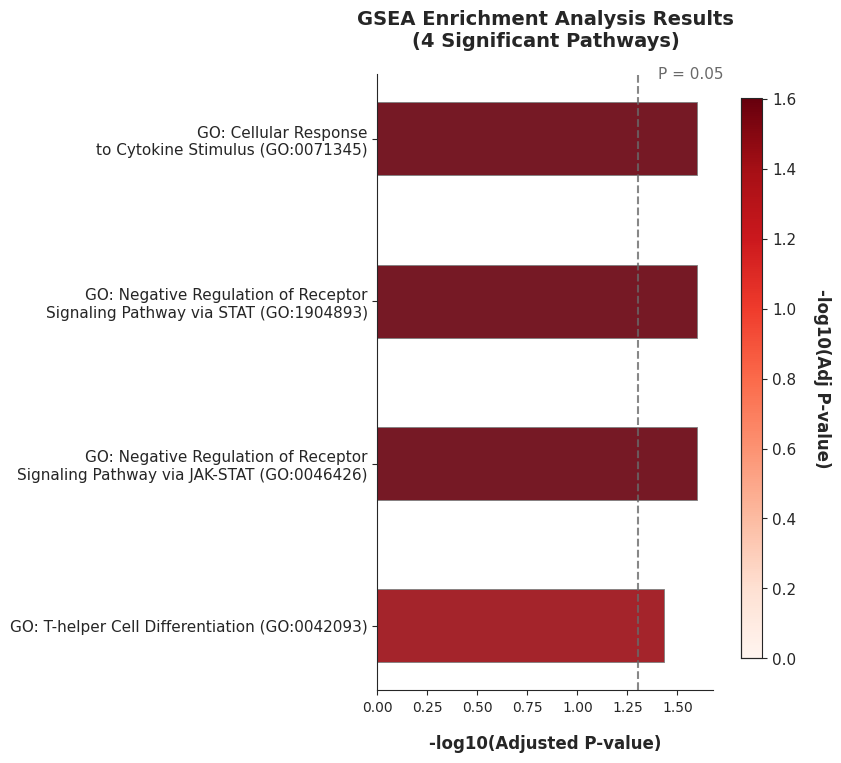

In [10]:
plt.rcParams["font.family"] = ["Arial", "SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("ticks")

significant_results = significant_results.copy()
significant_results['-log10(Adj_Pval)'] = -np.log10(significant_results['Adjusted P-value'])

significant_results_sorted = significant_results.sort_values('-log10(Adj_Pval)', ascending=True)

cmap = plt.cm.Reds
max_val = significant_results_sorted['-log10(Adj_Pval)'].max()
norm = mcolors.Normalize(vmin=0, vmax=max_val)
colors = cmap(norm(significant_results_sorted['-log10(Adj_Pval)'].values))

fig, ax = plt.subplots(figsize=(7, 8))

bars = ax.barh(range(len(significant_results_sorted)), 
               significant_results_sorted['-log10(Adj_Pval)'], 
               color=colors,
               alpha=0.9, 
               height=0.45,
               edgecolor='grey',
               linewidth=0.7)

labels_with_db = []
for _, row in significant_results_sorted.iterrows():
    db_prefix = ''
    if 'GO_Biological' in row['Gene_set']: db_prefix = 'GO'
    elif 'KEGG' in row['Gene_set']: db_prefix = 'KEGG'
    elif 'Reactome' in row['Gene_set']: db_prefix = 'Reactome'
    term = row['Term']
    full_label = f"{db_prefix}: {term}" if db_prefix else term
    if len(full_label) > 50:
        words = full_label.split()
        if len(words) > 1:
            mid = len(words) // 2
            formatted_label = f"{' '.join(words[:mid])}\n{' '.join(words[mid:])}"
        else:
            mid_point = len(full_label) // 2
            formatted_label = f"{full_label[:mid_point]}\n{full_label[mid_point:]}"
    else:
        formatted_label = full_label
    labels_with_db.append(formatted_label)

ax.set_yticks(range(len(significant_results_sorted)))
ax.set_yticklabels(labels_with_db, fontsize=11)

ax.set_xlabel('-log10(Adjusted P-value)', fontsize=12, fontweight='bold', labelpad=15)
ax.set_title(f'GSEA Enrichment Analysis Results\n({len(significant_results)} Significant Pathways)', 
             fontsize=14, fontweight='bold', pad=20)

ax.grid(False)

threshold = -np.log10(0.05)
ax.axvline(x=threshold, color='dimgrey', linestyle='--', alpha=0.8, linewidth=1.5)
ax.text(threshold + 0.1, ax.get_ylim()[1], 'P = 0.05', color='dimgrey', 
        ha='left', va='center', fontsize=11)

cax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
cbar.set_label('-log10(Adj P-value)', rotation=270, labelpad=25, 
               fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=11)
sns.despine()
plt.subplots_adjust(left=0.4, right=0.88)


plt.savefig('./Analysis/Figure/GSEA_plot/GSEA_Enrichment_Plot_Optimized.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()